# МОМО, II семестр. Домашнее задание №2

## 1) Импорт библиотек

In [1]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import pandas as pd # Библиотека Pandas для работы с табличными данными

import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import matplotlib as mpl
import seaborn as sns # библиотека Seaborn для визуализации данных из Pandas
import plotly.express as px

from sklearn.datasets import fetch_openml # функция библиотеки scikit-learn для загрузки данных с сайта OpenML

# from sklearn.decomposition import PCA # Метод главных компонент от мира scikit-learn
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN # Кластеризация DBSCAN от scikit-learn
from sklearn.mixture import GaussianMixture # EM-Кластеризация со смесью Гауссиан  от Scikit-learn

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('dark_background') # для установики темного фона графиков

## 2) Набор данных

В качестве данных мы рассмотрим набор данных [Fashion-MNIST](https://www.openml.org/search?type=data&status=active&id=40996)

Данный набор данных содержит изображения предметов одежды.

Размер изображений 28 на 28, что можно рассматривать как большую таблицу признаков из 784 столбцов

Единственный канал - "оттенки серого"

Изображения хранятся в 8-битном формате, т.е. оттенков серого 256 от 0 (черный) до 255 (белый)

In [3]:
# воспользуемся функцией fetch_openml для загрузки данных с сайта OpenML
X, y  = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame = True)
# нормализуем данные - из диапазона от 0 до 255 в диапазон от 0 до 1
X = X / 255
X.shape

(70000, 784)

In [4]:
# преобразуем метки к типа int
y = y.astype(int).values

Посмотрим на нашу табличку данных

In [5]:
X

pixel1  pixel2  pixel3  pixel4  pixel5    pixel6  pixel7  pixel8  \
0         0.0     0.0     0.0     0.0     0.0  0.000000     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0  0.003922     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0  0.000000     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0  0.000000     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0  0.000000     0.0     0.0   
...       ...     ...     ...     ...     ...       ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0  0.000000     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0  0.000000     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0  0.000000     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0  0.000000     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0  0.000000     0.0     0.0   

         pixel9   pixel10  ...  pixel775  pixel776  pixel777  pixel778  \
0      0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1      0.000000  0.000000  ...  0.466667  0.447059  0.509804  0.298039   
2      0.000000  0.086275  ...  0.000000  0.000000  0.003922  0.000000   
3      0.129412  0.376471  ...  0.000000  0.000000  0.000000  0.000000   
4      0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
...         ...       ...  ...       ...       ...       ...       ...   
69995  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
69996  0.000000  0.121569  ...  0.000000  0.000000  0.000000  0.000000   
69997  0.000000  0.000000  ...  0.105882  0.000000  0.000000  0.000000   
69998  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
69999  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   

       pixel779  pixel780  pixel781  pixel782  pixel783  pixel784  
0           0.0       0.0       0.0       0.0       0.0       0.0  
1           0.0       0.0       0.0       0.0       0.0       0.0  
2           0.0       0.0       0.0       0.0       0.0       0.0  
3           0.0       0.0       0.0       0.0       0.0       0.0  
4           0.0       0.0       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...       ...  
69995       0.0       0.0       0.0       0.0       0.0       0.0  
69996       0.0       0.0       0.0       0.0       0.0       0.0  
69997       0.0       0.0       0.0       0.0       0.0       0.0  
69998       0.0       0.0       0.0       0.0       0.0       0.0  
69999       0.0       0.0       0.0       0.0       0.0       0.0  

[70000 rows x 784 columns]

In [6]:
X.describe()

pixel1        pixel2        pixel3        pixel4        pixel5  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       0.000003      0.000025      0.000135      0.000388      0.000972   
std        0.000343      0.001163      0.004709      0.009643      0.017287   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        0.062745      0.176471      0.854902      0.725490      0.890196   

             pixel6        pixel7        pixel8        pixel9       pixel10  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       0.001603      0.003149      0.008645      0.022098      0.056510   
std        0.022911      0.032104      0.055362      0.092937      0.149758   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        0.901961      0.878431      0.882353      0.996078      1.000000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  70000.000000  70000.000000  70000.000000  70000.000000   
mean   ...      0.135617      0.091328      0.065144      0.069896   
std    ...      0.225822      0.191903      0.165000      0.172163   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.223529      0.031373      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean       0.089757      0.070463      0.033428      0.010790      0.003281   
std        0.203346      0.177379      0.115796      0.068179      0.036308   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           pixel784  
count  70000.000000  
mean       0.000286  
std        0.008353  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        0.666667  

[8 rows x 784 columns]

Создадим словарь "число-название одежды"

In [7]:
labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}


Разные примеры. Поменяв n, можно менять выборку данных для обзора.

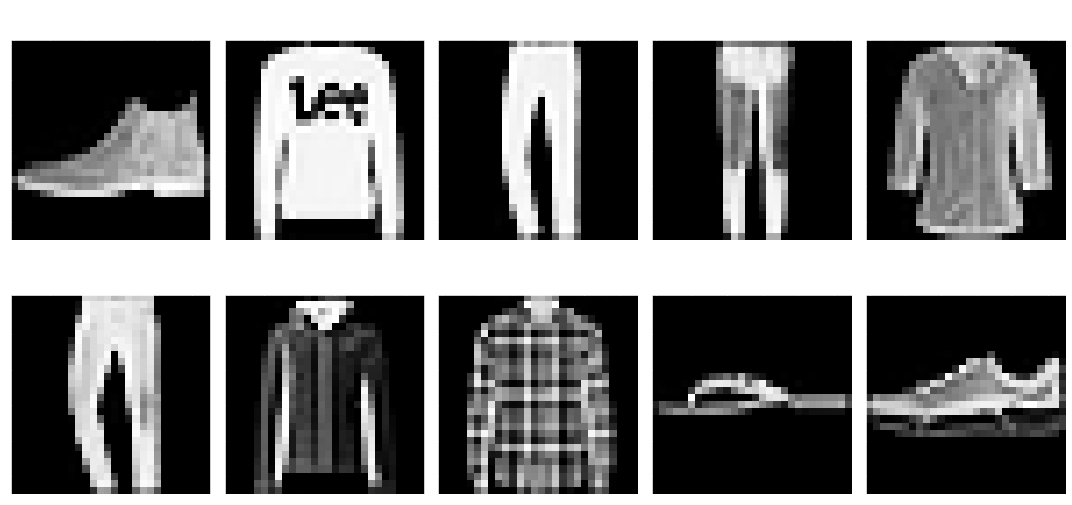

In [8]:
n = 60000

# создаем полотно
fig = plt.figure( figsize=(15,8) )
# на котором визуализируем 10 примеров изображений
# начиная с индекса n
for i in range(0,10):
    # каждое изображение будет на своем сабплоте
    ax = fig.add_subplot(2,5,i+1)
    # пишем какое число должно быть
    ax.set_title("{}".format(labels[y[i+n]] ), size=35)
    # ax.set_title("Число: {}".format(str(y[i+n]) ), size=35)
    # отрисовываем с помощью функции matshow
    # для этого нам вектор-строку из 784 элементов
    # нужно преобразовать в матрицу 28 на 28
    ax.matshow(1-X.loc[i+n,'pixel1':'pixel784'].values.reshape((28,28)).astype(float),
                cmap='Greys')
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.tight_layout()


## 3) Визуализация t-SNE

In [9]:
# Весь датасет слишком большой, возьмем из него только часть
X_part, y_part = X.values[:2500], y[:2500]

In [10]:
n_iter = 2000 
perplexity = 35 

tsne = TSNE(n_components=2, verbose=1,
            perplexity=perplexity, n_iter=n_iter,
            learning_rate = 'auto', init = 'pca')
tsne_results = tsne.fit_transform(X_part)

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 2500 samples in 0.015s...
[t-SNE] Computed neighbors for 2500 samples in 0.237s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2500
[t-SNE] Computed conditional probabilities for sample 2000 / 2500
[t-SNE] Computed conditional probabilities for sample 2500 / 2500
[t-SNE] Mean sigma: 2.146630
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.272972
[t-SNE] KL divergence after 2000 iterations: 0.970979


Визуализация

In [11]:
def plot_data_multy(ax,ds,name=''):
    X, y = ds

    ax.set_title(name)

    for i in range(X.shape[0]):
        # plt.text(X[i, 0], X[i, 1], str(labels[y[i]]),
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                color=plt.cm.tab10((y[i]+0.5) /10 ),
                fontdict={'weight': 'bold', 'size': 9})


    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

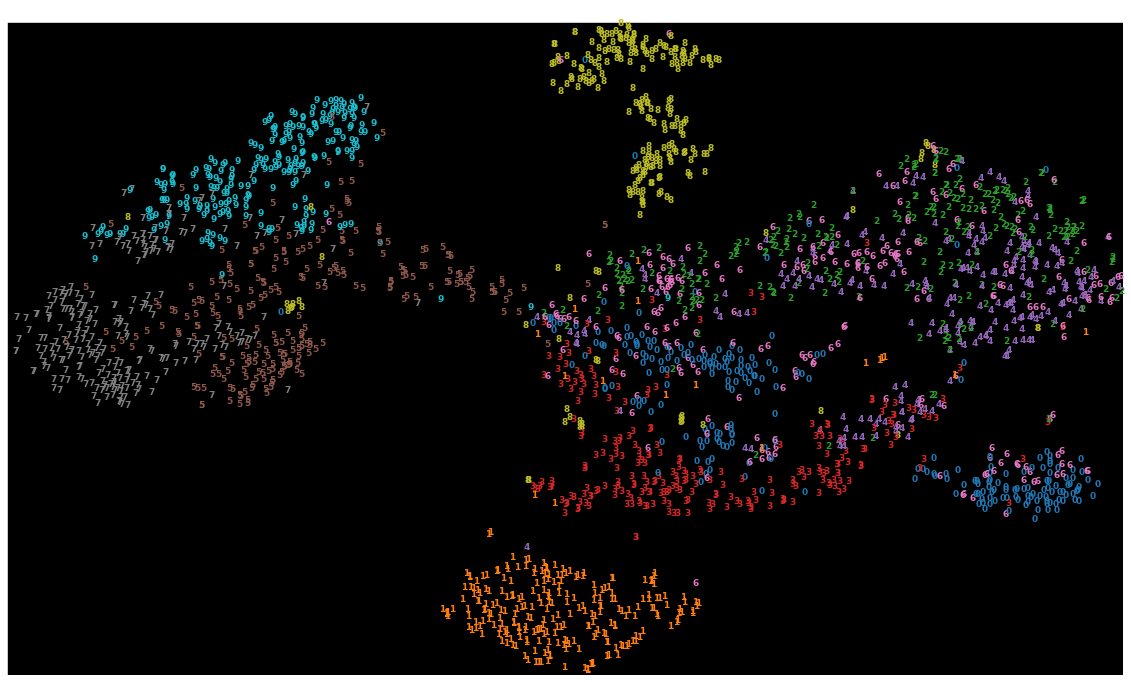

In [12]:
fig= plt.figure(figsize=(20,12))
ax = plt.subplot(1, 1, 1)
plot_data_multy(ax,[tsne_results,y_part],'t-SNE')

Интерактивная версия

In [13]:
df = pd.DataFrame(tsne_results, columns = ['t-SNE_1', 't-SNE_2'])
df['number'] = y_part.astype(str)

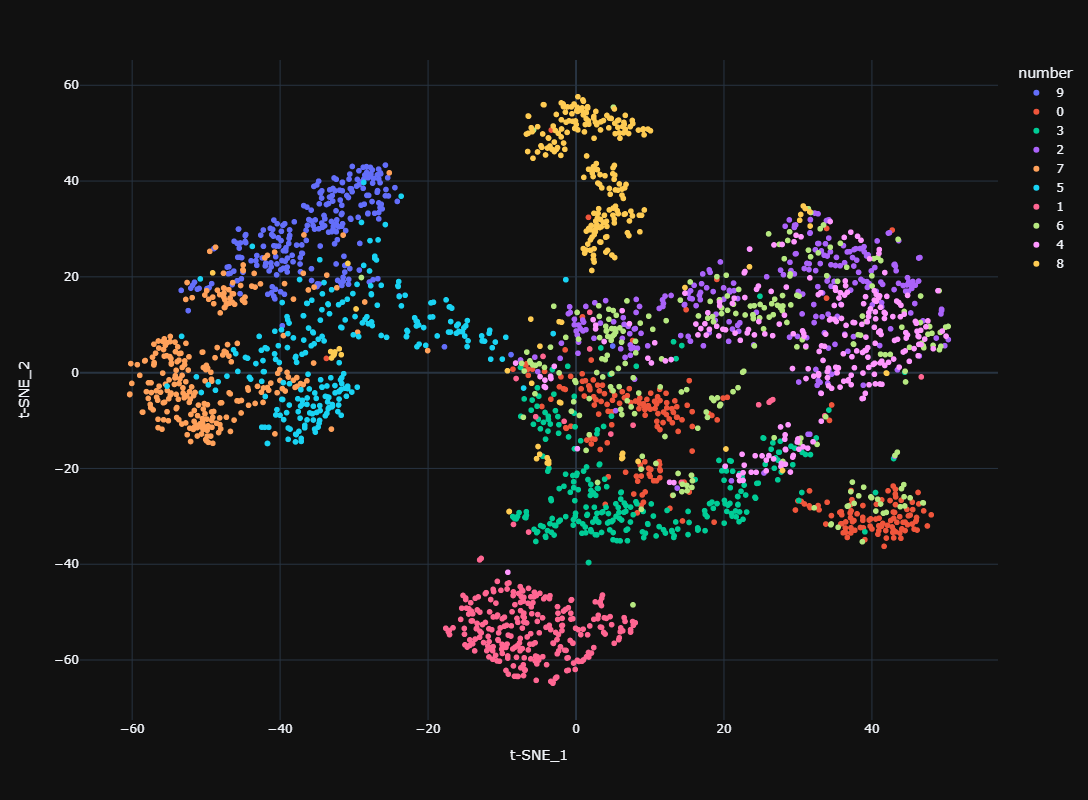

In [14]:
fig = px.scatter(
        df,
        x='t-SNE_1', y='t-SNE_2',
             color = 'number',
        labels={'color': 'number'},
        hover_data=[df.index]
)


fig.update_layout(
    height=800,
    width=1500,
    template = "plotly_dark"
)

fig.update_traces(textposition='top center')

fig.show()

Рассмотрим несколько "спорных" индексов

In [15]:
shady_figs = [972, # 0 среди 8
              2372, # 0 среди 8
              2017, # 4 среди 1
              1085, # 5 среди 7
              688, # 6 среди 1
              1323, # 8 среди "обуви"
              ]

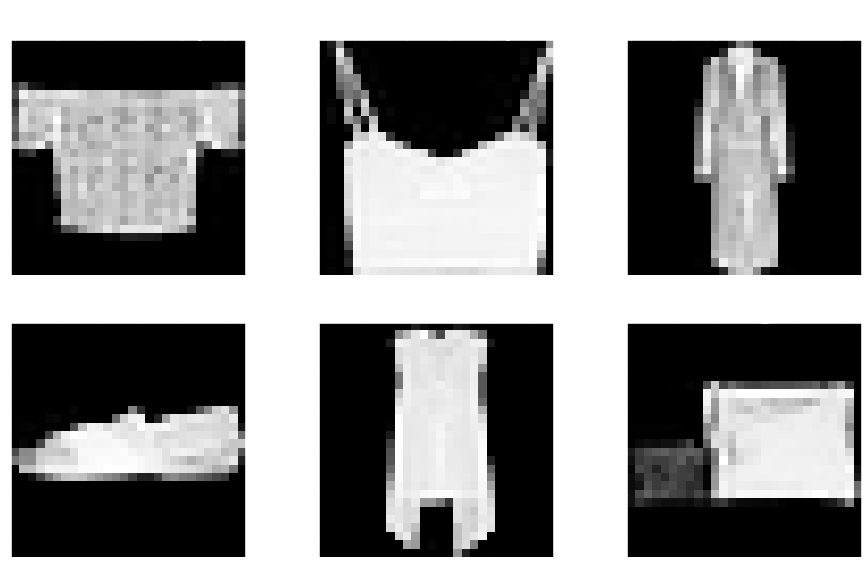

In [16]:
fig = plt.figure( figsize=(15,8) )
for n, i in enumerate(shady_figs):
    # каждое изображение будет на своем сабплоте
    ax = fig.add_subplot(2,3,n+1)
    # пишем какое число должно быть
    # ax.set_title("Число: {}".format(str(y[i]) ), size=35)
    ax.set_title("{}".format(labels[y[i]] ), size=35)
    # отрисовываем с помощью функции matshow
    # для этого нам вектор-строку из 784 элементов
    # нужно преобразовать в матрицу 28 на 28
    ax.matshow(1-X.loc[i,'pixel1':'pixel784'].values.reshape((28,28)).astype(float),
                cmap='Greys')
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.tight_layout()

#### <u>ВЫВОДЫ:</u>
1) Метод t-SNE достаточно хорошо разделил на разные группы разные классы;
2) Лучше всего отделены "8" (Bag) и "1" (Trouser). Судя по всему эти вещи не похожи на другие и есть характерные черты;
3) Также примечательно, что обувь "5" (Sandal), "7" (Sneaker) и "9" (Ankle boot) обособлена от других вещей, но между собой есть некоторые перекрытия, что логично, т.к. есть общая черта - что это обувь.
4) Метки "2" (Pullover), "4" (Coat) и "6" (Shirt) очень сильно перемещены между собой и плохо разделились между собой. Хотя они все имеют много общего между собой (это всё похоже на кофты) и от других вещей одежды они далеко.
5) Ошибочные выбросы:
    - первые два "0 (T-shirt/top) среди 8 (Bag)" действительно можно принять за элегантные сумочки :)
    - третий "4 (Coat) среди 1 (Trouser)" видно был спутал из-за того, что имеет узкий силуэт похожий на брюки;
    - четвертый "5 (Sandal) среди 7 (Sneaker)" очень сложно распознать и сейчас что это. Это точно обувь, но к какому классу относится ответить сложно
    - пятый "6 (Shirt) среди 1 (Trouser)" был спутан из узкости силуэта и разреза в нижей части картинки как у "штанов"
    - шестой "8 (Bag) среди "обуви" наверно был перепутан из-за узкого горизонтального силуэта и перепада высоты силуэта между левым и правым краем картинки как у ботинков.
5) Метод главных компонент [PCA из I семестра](https://apps.skillfactory.ru/learning/course/course-v1:Skillfactory+URFUML2023+SEP2023/block-v1:Skillfactory+URFUML2023+SEP2023+type@sequential+block@a84725c32c3f41d4a92dfde6fd456141/block-v1:Skillfactory+URFUML2023+SEP2023+type@vertical+block@35ae478ccc2d453c87d1dc9c6cd5965b?homework=4306) смог в некоторых проекциях выделить "9" (Ankle boot), "8" (Bag) и "1" (Trouser) остальные очень сильно были перемешаны между собой.

## 4) EM-Кластеризация 

In [17]:
# Создаем Класс ЕМ-Кластеризации со смесью моделей Гауссиан
gm = GaussianMixture(n_components=10, covariance_type = 'full')

In [18]:
# Обучаем модель
gm.fit(tsne_results)

GaussianMixture(n_components=10)

In [19]:
# Функция отрисовки элипсов, описывающих кластеры
def make_ellipses(gmm, ax, colors):

    """Отрисовка элипсов, описывающих кластеры
    Входные переменные:
    ===========
    gmm: обученный класс EM-кластеризации
    ax: полотно, на котором мы будем рисовать
    colors: цвета для каждого кластера
    """
    for n, color in enumerate(colors): # перебираем все цвета (кластеры)
        # проверяем какой тим матрицы ковариации мы вабрали
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]

        # ищем собственные значения (v) и собственные вектора (w) матрицы ковариации
        v, w = np.linalg.eigh(covariances)

        # нормируем собственные вектора
        u = w[0] / np.linalg.norm(w[0])

        # находим угол наклона
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi
        # нормируем собственные значения
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)

        # отрисовываем объект типа Ellipse
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], # координаты центра
            v[0],  # ширина эллипса
            v[1], # высота эллипса
            angle= 180 + angle, # угол наклона эллипса
            fc=color, # цвет заполнения эллипса
            ec = 'k' # цвет края - черный
        )
        ell.set_clip_box(ax.bbox) # согласуем огнаничения эллипса с ограничением полотна
        ell.set_alpha(0.8) # прозрачность
        ax.add_artist(ell) #добавляем объект на полотно
        ax.set_aspect("equal", "datalim")

In [20]:
def plot_em_clustering(X, gmm):
    """Отрисовка элипсов, описывающих кластеры
    Входные переменные:
    ===========
    X: данные, на которых мы хотим построить визуализацию
    gmm: обученный класс EM-кластеризации
    """
    labels = gmm.predict(X) # предсказываем метки кластеров
    fig= plt.figure(figsize=(20,12))
    ax = plt.subplot(1, 1, 1) # создаем полотно
    # отрисовываем скатерограмму
    sc = ax.scatter(X[:, 0], X[:, 1], # данные
                    c=labels,  # подкрашиваем по предсказанным меткам
                    alpha = 0.6, # прозрачность
                    cmap = 'bwr', # тип цветовой карты
                    edgecolor = 'k', # цвет края - черный
                    s = 100  # размер
                    )

    # Создаем список из цветов
    colors = []
    # Для каждой метки класстеров
    markers = np.unique(labels)
    # Цвета подбираются таким же как и цветовая карта на скатерорамме
    for c in markers:
        colors.append(sc.to_rgba(c))

    # Воспользуемся написанной выше функцией для визуализации эллипсов
    make_ellipses(gmm, ax, colors)

    plt.xticks([],[])
    plt.yticks([],[])

In [21]:
# Такая же функция как и выше, только с меньшим полотном для лучшего визуального восприятия
def plot_em_clustering_mini(X, gmm):
    """Отрисовка элипсов, описывающих кластеры
    Входные переменные:
    ===========
    X: данные, на которых мы хотим построить визуализацию
    gmm: обученный класс EM-кластеризации
    """
    labels = gmm.predict(X) # предсказываем метки кластеров
    fig= plt.figure(figsize=(8,6))
    ax = plt.subplot(1, 1, 1) # создаем полотно
    # отрисовываем скатерограмму
    sc = ax.scatter(X[:, 0], X[:, 1], # данные
                    c=labels,  # подкрашиваем по предсказанным меткам
                    alpha = 0.6, # прозрачность
                    cmap = 'bwr', # тип цветовой карты
                    edgecolor = 'k', # цвет края - черный
                    s = 100  # размер
                    )

    # Создаем список из цветов
    colors = []
    # Для каждой метки класстеров
    markers = np.unique(labels)
    # Цвета подбираются таким же как и цветовая карта на скатерорамме
    for c in markers:
        colors.append(sc.to_rgba(c))

    # Воспользуемся написанной выше функцией для визуализации эллипсов
    make_ellipses(gmm, ax, colors)

    plt.xticks([],[])
    plt.yticks([],[])

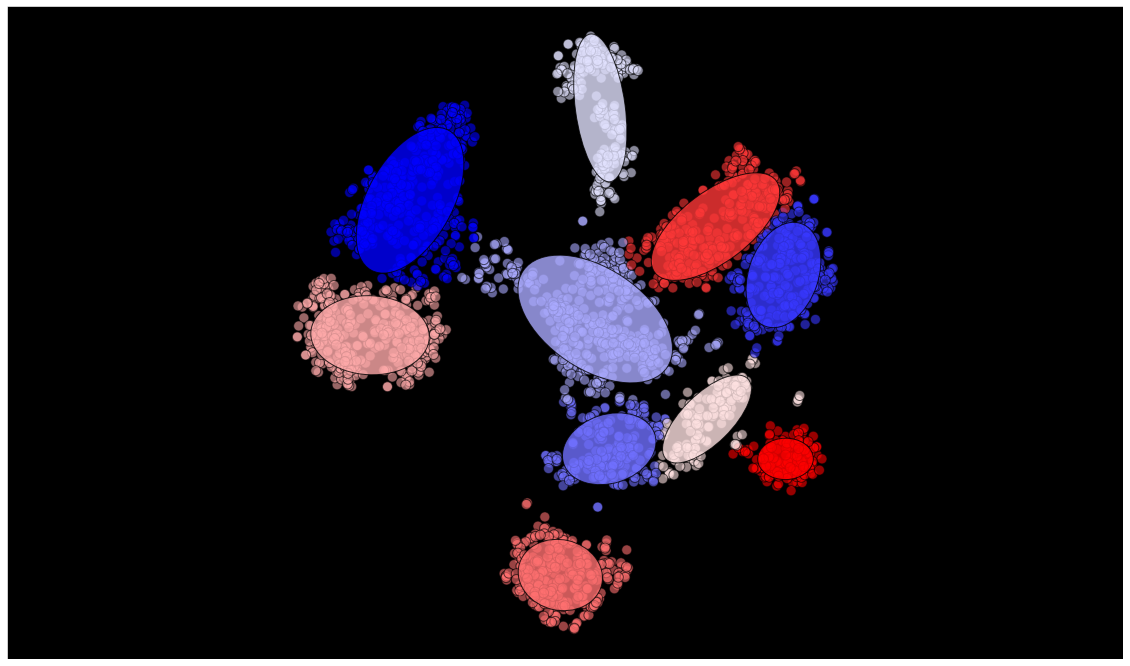

In [22]:
plot_em_clustering(tsne_results, gm)

Проверим разные типы матрицы ковариации:

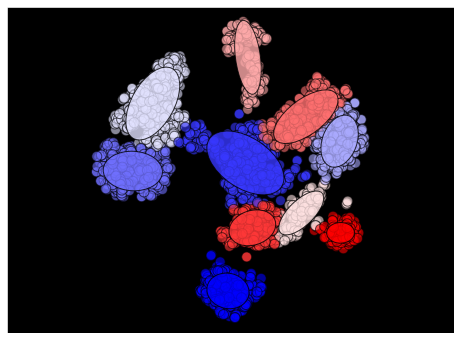

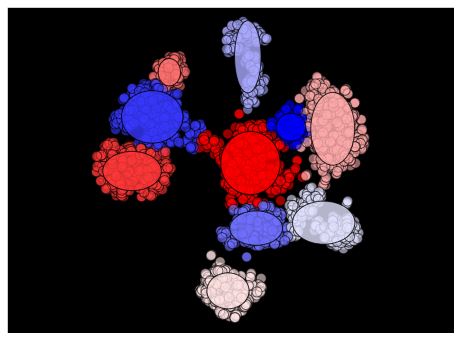

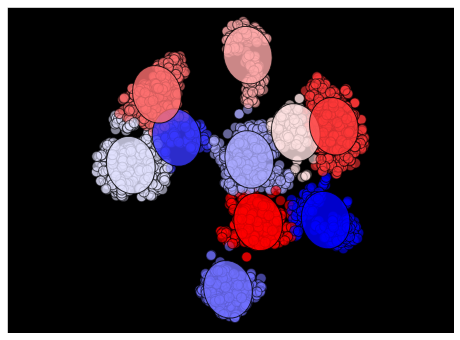

In [23]:
gm_check = GaussianMixture(n_components=10, covariance_type = 'full')
gm_check.fit(tsne_results)
plot_em_clustering_mini(tsne_results, gm_check)

gm_check = GaussianMixture(n_components=10, covariance_type = 'diag')
gm_check.fit(tsne_results)
plot_em_clustering_mini(tsne_results, gm_check)

gm_check = GaussianMixture(n_components=10, covariance_type = 'tied')
gm_check.fit(tsne_results)
plot_em_clustering_mini(tsne_results, gm_check)

Проверим разные количество кластеров:

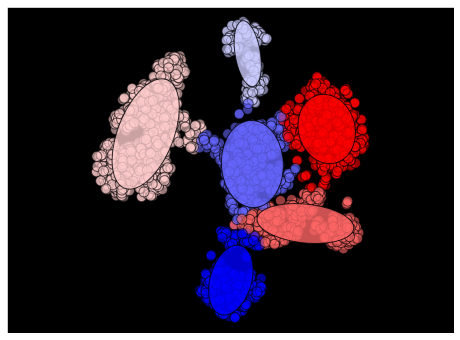

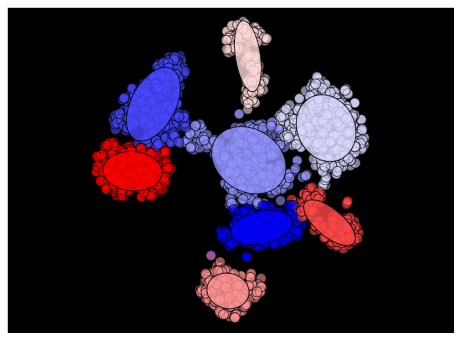

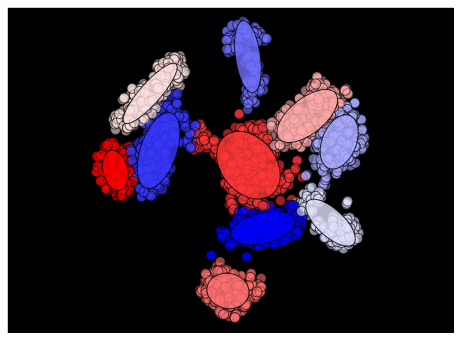

In [24]:
gm_check = GaussianMixture(n_components=6, covariance_type = 'full')
gm_check.fit(tsne_results)
plot_em_clustering_mini(tsne_results, gm_check)

gm_check = GaussianMixture(n_components=8, covariance_type = 'full')
gm_check.fit(tsne_results)
plot_em_clustering_mini(tsne_results, gm_check)

gm_check = GaussianMixture(n_components=10, covariance_type = 'full')
gm_check.fit(tsne_results)
plot_em_clustering_mini(tsne_results, gm_check)

#### <u>ВЫВОДЫ:</u>
1) ЕМ-кластеризация неплохо справилась с разбивкой на кластеры. 
    - достаточно хорошо определила и разделила кластеры 1 и 8;
    - разделила кластеры "обуви" (5,7,9) на такие же 3 похожие группы;
    - также похожие группы получились 3 и 0 в нижней части (выше 1);
    - ну и перемешанные 2, 4 и 6 было невозможно корректно разделить.
2) Перебрав гиперпараметры видно:
    - тип ковариационной матрицы "full" лучше всего подходит для данной задачи - для каждого кластера он подбирает свои "облака распределения". И из визуализации t-SNE видно, что все группы по разному вытянуты и сориентированы.
    - в данной задаче было известно, что должно быть 10 кластеров. Но если бы это не было известно, то по графикам можно понять, что 8 кластеров дают более логичную картинку распределения кластеров.
